In [2]:
from __future__ import print_function, division

import matplotlib.pyplot as plt
%matplotlib inline

import warnings

warnings.filterwarnings('ignore', category=FutureWarning)

import numpy as np
import pandas as pd

In [3]:
#removing columns and rows with null/NaN values

df = pd.read_csv('project2data.csv')

In [4]:
df.head()

,age,sex,Chest Pain type = Value 1: typical angina\nValue 2: atypical angina\nValue 3: non-anginal pain\nValue 4: asymptomatic chest pain type,resting_blood_pressure,cholesterol,Fasting_Blood_Sugar_Under-120=True(1),RestingECG,MaxHeartRate,"ExercisedInduced_1=Y,0=N",Death
0,63,1,3,145,233,1,0,150,0,1
1,37,1,2,130,250,0,1,187,0,1
2,41,0,1,130,204,0,0,172,0,1
3,56,1,1,120,236,0,1,178,0,1
4,57,0,0,120,354,0,1,163,1,1


In [5]:
print(df['Chest Pain type = Value 1: typical angina\nValue 2: atypical angina\nValue 3: non-anginal pain\nValue 4: asymptomatic chest pain type'].describe())

count    303.000000
mean       0.966997
std        1.032052
min        0.000000
25%        0.000000
50%        1.000000
75%        2.000000
max        3.000000
Name: Chest Pain type = Value 1: typical angina\nValue 2: atypical angina\nValue 3: non-anginal pain\nValue 4: asymptomatic chest pain type, dtype: float64


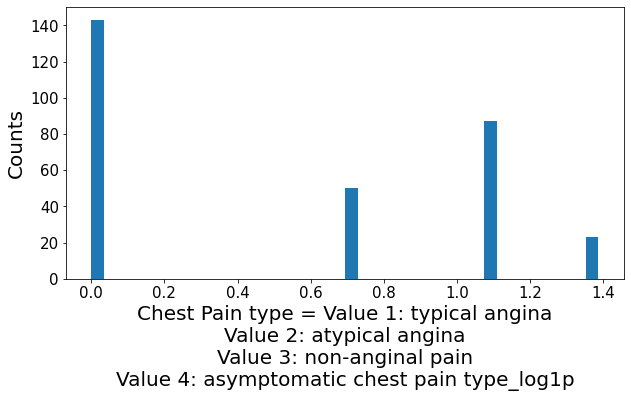

In [6]:
def log_transformation(df):
    return df.apply(np.log1p)

df['Chest Pain type = Value 1: typical angina\nValue 2: atypical angina\nValue 3: non-anginal pain\nValue 4: asymptomatic chest pain type_log1p'] = log_transformation(df['Chest Pain type = Value 1: typical angina\nValue 2: atypical angina\nValue 3: non-anginal pain\nValue 4: asymptomatic chest pain type'])

plt.rcParams['figure.figsize'] = (10, 5)

plt.hist(df['Chest Pain type = Value 1: typical angina\nValue 2: atypical angina\nValue 3: non-anginal pain\nValue 4: asymptomatic chest pain type_log1p'], bins=40)
plt.xlabel('Chest Pain type = Value 1: typical angina\nValue 2: atypical angina\nValue 3: non-anginal pain\nValue 4: asymptomatic chest pain type_log1p', fontsize=20)
plt.ylabel('Counts', fontsize=20)
plt.tick_params(axis='both', labelsize=15)
plt.show()

In [7]:
def log_transformation(df):
    return df.apply(np.log1p)

df['Chest Pain type = Value 1: typical angina\nValue 2: atypical angina\nValue 3: non-anginal pain\nValue 4: asymptomatic chest pain type'] = log_transformation(df['Chest Pain type = Value 1: typical angina\nValue 2: atypical angina\nValue 3: non-anginal pain\nValue 4: asymptomatic chest pain type'])

In [8]:
import tensorflow as tf

In [9]:
rng = np.random

In [10]:
df.dtypes

age                                                                                                                                              int64
sex                                                                                                                                              int64
Chest Pain type = Value 1: typical angina\nValue 2: atypical angina\nValue 3: non-anginal pain\nValue 4: asymptomatic chest pain type          float64
resting_blood_pressure                                                                                                                           int64
cholesterol                                                                                                                                      int64
Fasting_Blood_Sugar_Under-120=True(1)                                                                                                            int64
RestingECG                                                                                    

In [113]:
# df['homs_per_100k'] = df['homs_per_100k'].astype(int)

# df.dtypes

ORI                     object
year                     int64
department_name         object
total_pop                int64
homs_sum                 int64
rape_sum                 int64
rob_sum                  int64
agg_ass_sum              int64
violent_crime            int64
months_reported          int64
violent_per_100k         int64
homs_per_100k            int32
rape_per_100k            int64
rob_per_100k             int64
agg_ass_per_100k         int64
source                 float64
url                    float64
Unnamed: 17            float64
total_pop_log1p        float64
homs_per_100k_log1p    float64
dtype: object

In [11]:
value = df['Chest Pain type = Value 1: typical angina\nValue 2: atypical angina\nValue 3: non-anginal pain\nValue 4: asymptomatic chest pain type'].values
round = df['Death'].values

In [12]:
#hyperparameters
learning_rate = .01
training_epochs = 100

#parameters for the script
display_step = 50

In [13]:
train_X = np.asarray(value)
train_Y = np.asarray(round)

In [14]:
n_samples = train_X.shape[0]

In [15]:
n_samples = train_X.shape[0]

In [16]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior() 

Instructions for updating:
non-resource variables are not supported in the long term


In [17]:
X = tf.placeholder('float')
Y = tf.placeholder('float')

In [18]:
W = tf.Variable(rng.randn(), name='Weight')
b = tf.Variable(rng.randn(), name='bias')

In [19]:
pred = tf.add(tf.multiply(X,W),b)

In [20]:
error = tf.reduce_sum(tf.pow(pred-Y,2))/(2*n_samples)

In [21]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

In [22]:
optimizer =tf.train.GradientDescentOptimizer(learning_rate).minimize(error)

In [23]:
init = tf.global_variables_initializer()

In [24]:
# Start training
with tf.Session() as sess:

    # Run the initializer
    sess.run(init)

    # Fit all training data
    for epoch in range(training_epochs):
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X: x, Y: y})

        # Display logs per epoch step
        if (epoch+1) % display_step == 0:
            c = sess.run(error, feed_dict={X: train_X, Y:train_Y})
            print("Epoch:", '%04d' % (epoch+1), "error=", "{:.9f}".format(c), \
                "W=", sess.run(W), "b=", sess.run(b))

    print("Optimization Finished!")
    training_error = sess.run(error, feed_dict={X: train_X, Y: train_Y})
    print("Training error=", training_error, "W=", sess.run(W), "b=", sess.run(b), '\n')

Epoch: 0050 error= 0.120919362 W= 0.09590804 b= 0.36942214
Epoch: 0100 error= 0.108583674 W= 0.1615597 b= 0.4095978
Optimization Finished!
Training error= 0.108583674 W= 0.1615597 b= 0.4095978 



RuntimeError: Attempted to use a closed Session.

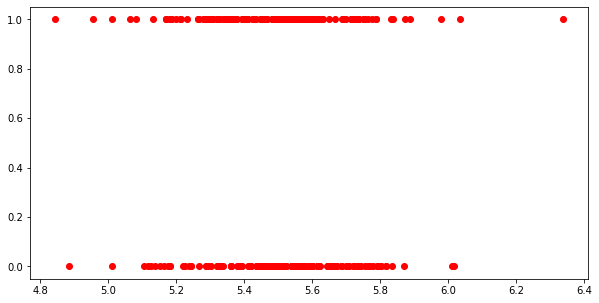

In [26]:
# Print Graph Display
plt.plot(train_X, train_Y, 'ro', label='Original data')
plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
plt.legend()
plt.show()

In [25]:
test_X = np.asarray([2,4,6,8,10])
test_Y = np.asarray([25,23,21,19,17])

In [26]:
data = [df["Chest Pain type = Value 1: typical angina\nValue 2: atypical angina\nValue 3: non-anginal pain\nValue 4: asymptomatic chest pain type"], df["Death"]]
headers = ["Chest Pain type = Value 1: typical angina\nValue 2: atypical angina\nValue 3: non-anginal pain\nValue 4: asymptomatic chest pain type", "Death=Yes=1"]
df = pd.concat(data, axis=1, keys=headers)


df.head(5)

,Chest Pain type = Value 1: typical angina\nValue 2: atypical angina\nValue 3: non-anginal pain\nValue 4: asymptomatic chest pain type,Death=Yes=1
0,1.386294,1
1,1.098612,1
2,0.693147,1
3,0.693147,1
4,0.000000,1


In [27]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import sklearn
from sklearn.neural_network import MLPClassifier

In [28]:
df.head(5)

,Chest Pain type = Value 1: typical angina\nValue 2: atypical angina\nValue 3: non-anginal pain\nValue 4: asymptomatic chest pain type,Death=Yes=1
0,1.386294,1
1,1.098612,1
2,0.693147,1
3,0.693147,1
4,0.000000,1


In [29]:
X= df.iloc[:,:-1]
y= df.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

# Apply the model to the training built in sklearn
mlp = MLPClassifier(hidden_layer_sizes=(16,16,16), activation='relu', solver='adam', max_iter=1)

In [30]:
mlp.fit(X_train, y_train)


C:\Users\jptho\AppData\Roaming\Python\Python38\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(16, 16, 16), max_iter=1)

In [31]:
# predict the train model
pred_train = mlp.predict(X_train)
pred_test = mlp.predict(X_test)


In [32]:
#Check for accuracy
print(accuracy_score(y_train, pred_train))
print(accuracy_score(y_test, pred_test))

0.44339622641509435
0.4835164835164835


In [33]:
#Check the confusion matrix and the classification report of the training set
print(confusion_matrix(y_train,pred_train))
# print precision,recall,f1-score,support
print(classification_report(y_train,pred_train)) 

[[ 94   0]
 [118   0]]
              precision    recall  f1-score   support

           0       0.44      1.00      0.61        94
           1       0.00      0.00      0.00       118

    accuracy                           0.44       212
   macro avg       0.22      0.50      0.31       212
weighted avg       0.20      0.44      0.27       212



C:\Users\jptho\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jptho\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jptho\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [34]:
#Check confusion matrix and the classification report of the test set
print(confusion_matrix(y_test,pred_test))
# print precision,recall,f1-score,support
print(classification_report(y_test,pred_test))

[[44  0]
 [47  0]]
              precision    recall  f1-score   support

           0       0.48      1.00      0.65        44
           1       0.00      0.00      0.00        47

    accuracy                           0.48        91
   macro avg       0.24      0.50      0.33        91
weighted avg       0.23      0.48      0.32        91



C:\Users\jptho\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jptho\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jptho\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
